# **07. 군집화 (Clustering)**

## **7.1 K-mean Algorithm**
- 군집 중심점 (centroid) 이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집화에서 가장 일반적으로 사용되는 알고리즘

---

1.   군집 중심점은 선택된 포인트의 평균 지점으로 이동
2.   이동한 중심점에서 다시 가까운 포인트를 선택한 후 다시 이들의 평균 지점으로 이동
3.  더 이상 중심점의 이동이 없을 경우반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화

---

- 장점: 쉽고 간결한 알고리즘
- 단점
    1.  거리 기반 알고리즘으로 속성 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (→ PCA 차원감소)
    2.  반복횟수가 많을 경우 수행 시간이 매우 느려짐
    3.  몇 개의 군집을 선택해야 할지 가이드하기 어려움

### **사이킷런 KMeans 클래스**
    class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

    - n_cluster: # clusters
    - init: 초기 centroid 좌표 설정 방식 (일반적으로 'k-means++')
    - max_iter: 최대 반복 횟수

    # 주요 속성
    - labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_: 각 군집 중심점 좌표

    # fit(), fit_transform()


### 붓꽃 데이터 세트 K-means Clustering
- 붓꽃의 꽃받침(sepal), 꽃잎(petal)의 길이에 따른 군집화

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 실제 붓꽃 품종 분류 값과 비교
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [ ]:
## 붓꽃 데이터 세트의 군집화를 시각화
# 2차원 평면상에 표현하고자 PCA 차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


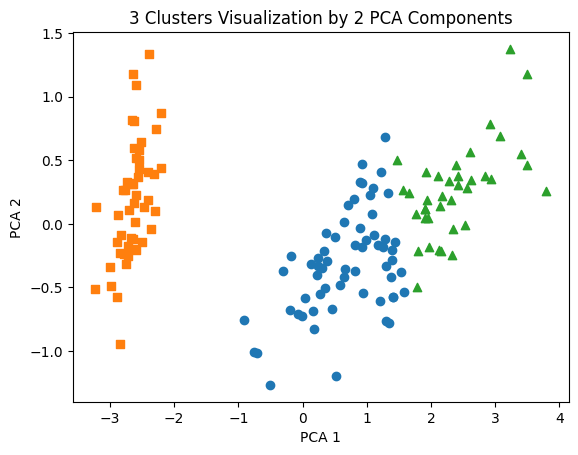

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components');

- Cluster1(■): 명확히 다른 군집과 분리
- Cluster2(●), Cluster3(▲): 상당 수준 분리돼 있지만, Cluster1(■)만큼 명확하게 분리돼 있지는 않음

### **군집화 알고리즘 테스트를 위한 데이터 생성**
1.  make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능
2.  make_classification(): 노이즈를 포함한 데이터 생성에 유용
3.  make_circle(): 중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성
4.  make_moon():  중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성

        sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)


In [ ]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


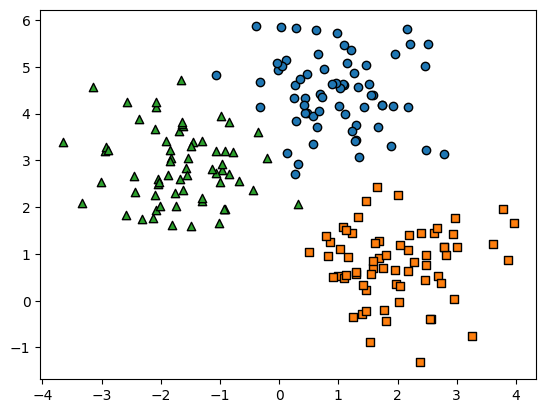

In [ ]:
## 산점도
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


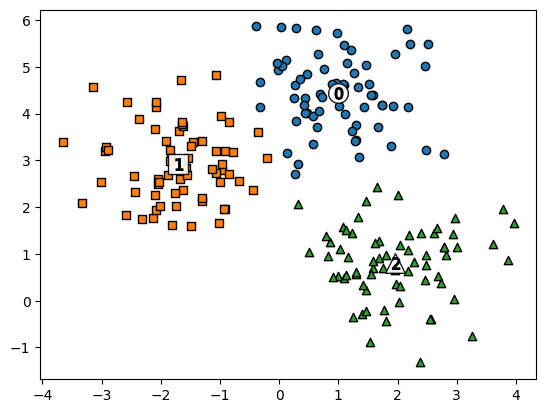

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show();

In [ ]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64

## **7.2 군집 평가 (Cluster Evaluation)**
### **실루엣 분석 (shihouette analysis)**
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있는지

---

### **실루엣 계수** $s(i) = ({b(i)-a(i)}) / ({max(a(i), b(i))})$
- 개별 데이터가 가지는 군집화 지표
- 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타냄
- `1` 근처 군집과 더 멀리 떨어져 있다    `0` 근처 군집과 가까워진다 `-` 아예 다른 군집에 데이터 포인트가 할당됐다


---

        - 각 데이터 포인트의 실루엣 계수
        sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)

        - 전체 데이터의 실루엣 계수 값의 평균
        sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)


---

### **좋은 군집화**
1.  전체 실루엣 계수의 평균값이 1에 가까울수록
2.  개별 군집의 편균값의 편차가 크지 않아야 함

### **붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터의 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Shilhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Shilhouette Analysis Score: 0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
# 군집별 평균 실루엣 계수 값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해,
- 0번은 약 0.41, 2번은 약 0.45로 상대적으로 평균값이 1번에 비해 낮음

### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- 여러 개의 군집 개수가 주어졌을 때, 이를 분석한 도표를 참고해 평균 실루엣 계수로 군집 개수를 최적화하는 방법

## **7.3 평균 이동 (Mean Shift)**
- K-Means 와 유사하게, 중심을 군집의 중심으로 지속적으로 이동하면서 군집화를 수행
- 차이점: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동 !
        - 확률 밀도 함수가 피크인 점을 centroid로 선정
        - 일반적으로 주어진 모델의 PDF를 찾기 위해 KDE (Kernal Density Estimation) 이용

---

### **KDE**
- 커널 (Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
- 대표적인 커널 함수: 가우시안 분포 함수
- h: 대역폭(bandwidth)
        - KDE 형태를 부드러운(또는 표적한) 형태로 평활화(Smoothing)하는데 적용
        - 확률 밀도 추정 성능을 크게 좌우함
        - h가 매우 작으면, 변동성이 큰 방식으로 PDF를 추정 → 과적합 / 많은 수의 centroid
        - h가 매우 크면, 과도하게 평활화된 KDE로 인해 지나치게 단순화된 PDF 추정 → 과소적합 / 적은 수의 centroid

---

1.  개별 데이터의 특정 반경 내의 주변 데이터를 포함한 데이터 분포도를 KDB 기반의 Mean Shift 알고리즘으로 계산
2.  KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3.  모든 데이터에 대해 1, 2를 수행하면서 데이터를 이동. 개별 데이터들이 centroid로 모임
4.  지정된 반복 횟수만큼 전체 데이터에 대해 KDE 기반으로 데이터를 이동시키면서 군집화 수행
5.  개별 데이터들이 모인 중심점을 centroid로 설정

---

- 장점
1.  데이터 세트의 형태를 특정 형태, 특정 분포도 기반의 모델로 가정하지 않으므로 유연한 군집화 가능
2.  이상치의 영향력이 크지 않음
3.  미리 군집의 개수를 정할 필요 없음

- 단점: 수행 시간이 오래 걸리고, bandwidth에 따른 군집화 영향도가 매우 큼


### **사이킷런의 MeanShift 클래스**
        class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)

        - bandwidth: h

---

        - 최적의 대역폭 계산을 위한 함수
        sklearn.cluster.estimate_bandwidth(X, *, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)

        

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0~5까지 6개로 지나치게 세분화돼 군집화되었음
        일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐 !

In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 잘 군집화되었음
        데이터 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미침
        → MeanShift에서 bandwidth를 최적화 값으로 설정하는 것 매우 중요 !
        → 사이킷런 estimate_bandwidth()

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
## estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력값으로 적용해 군집화 수행
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


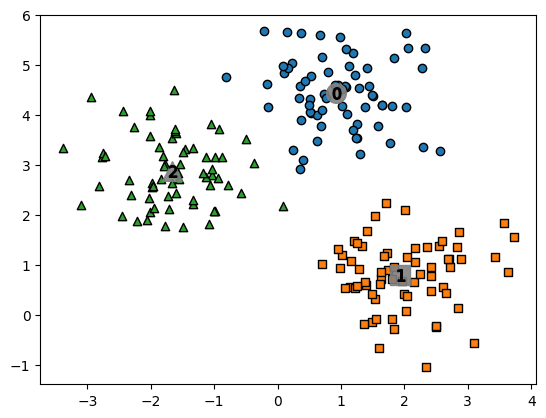

In [ ]:
## 구성된 3개의 군집을 시각화
# 평균 이동도 cluster_centers_ 속성으로 군집 중심 좌표 표시 가능
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels) # [0, 1, 2]
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show();

In [ ]:
# 원본 target 값과 비교
clusterDF.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64

## **7.4 GMM (Gaussian Mixture Model)**
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터의 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식

        # 모수 추정 (EM 방법 적용)
        - 개별 정규 분포의 평균과 분산 추정
        - 각 데이터가 어떤 정규 분포에 해당되는지의 확률 추정

---

        class sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

        - n_components: gaussian mixture 모델의 총 개수 → 군집의 개수를 정하는데 중요한 역할 !


### **GMM을 이용한 붓꽃 데이터 세트 군집화**
- 거리 기반의 K-means, 확률 기반의 GMM을 이용해 군집화 수행 후 비교

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


- Target 1만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑됐음
- K-means 군집화 결과보다 더 효과적인 분류 결과가 도출됨
- 붓꼿 데이터 세트가 GMM 군집화에 더 효과적이라는 의미

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64

### **GMM과 K-means 비교**

#### **KMeans**
- 원형의 범위에서 군집화 수행
- 데이터 세트가 원형의 범위를 가질수록 군집화 효율은 높아짐
- 데이터가 길쭉한 타원형으로 늘어선 경우에는 군집화를 잘 수행하지 못함

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_
    target_list = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

    for target in target_list:
        target_cluster = dataframe[dataframe[label_name]==target]

        if target == -1:
            cluster_legend = 'Noise'
        else:
            cluster_legend = 'Cluster %d' % target

        plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target], label=cluster_legend)
        plt.legend()

        if iscenter:
            center_x_y = centers[target]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, marker=markers[target])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % target)

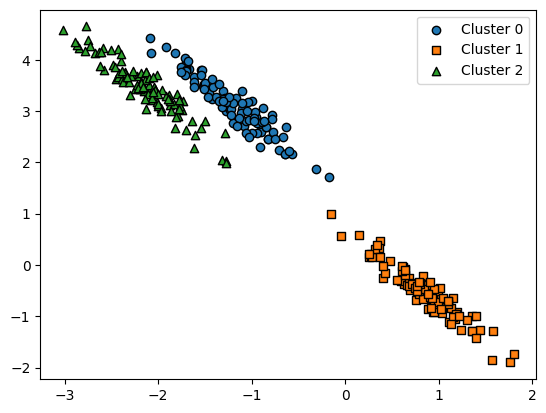

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


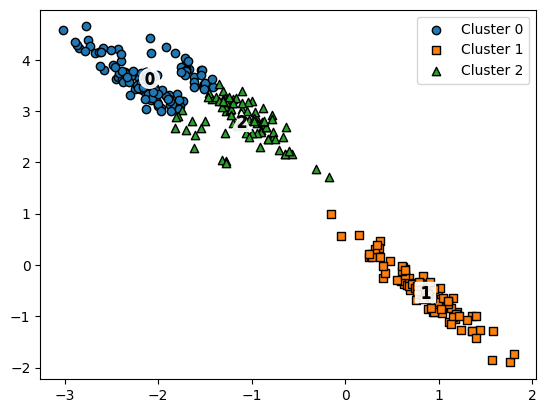

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적화 군집화가 어려움

#### **GMM**

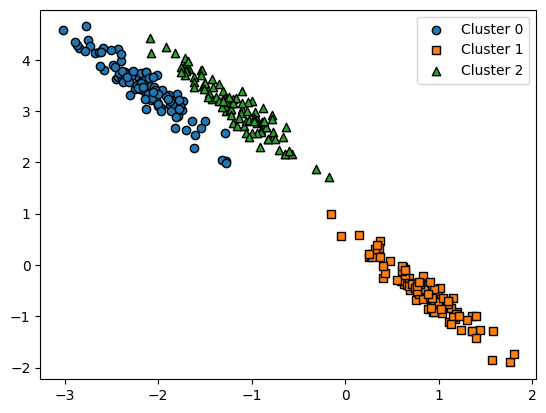

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됐음

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


## **7.5 DBSCAN (Density Based Spatial Clustering of Applications with Noise)**
- 밀도 기반 군집화의 대표적인 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함
- 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식

        # 중요 파라미터
        - 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
        - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

        # 데이터 포인트 정의 - 입실론 주변 영역 내에 포함되는 최소 데이터 개수 충족 여부에 따라
        - 핵심 포인트(Core Point): 주변 영역
        - 이웃 포인트(Neighbor Point)
        - 경계 포인트(Border Point)
        - 잡음 포인트(Noise Point)

### **사이킷런의 DBSCAN 클래스**
        class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

        - eps: 입실론 주변 영역의 반경 (일반적으로 1 이하의 값으로 설정)
        - min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수 (min points + 1)

        * 적절한 eps, min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요 !
        * eps 크게 하면, 노이즈 데이터 개수가 작아지고
        * min_samples 크게 하면, 주어진 반경 내 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐

### **붓꽃 데이터 세트를 DBSCAN 알고리즘으로 군집화**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64

- 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
- 따라서 0과 1 두 개의 군집으로 군집화되었음
- Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아님
- DBSCAN은 군집의 개수를 알고리즘에 따라 자동 지정하기 때문

<ipython-input-30-d0a336e45b28>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target], label=cluster_legend)


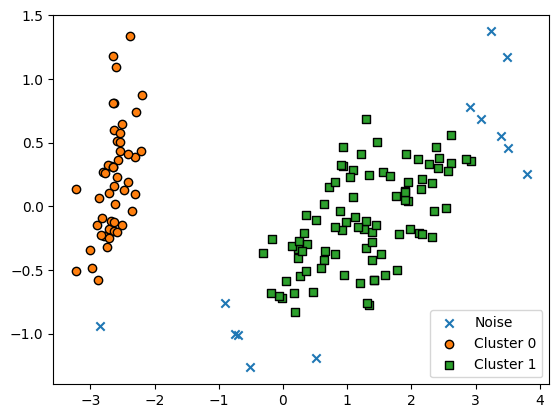

In [ ]:
## PCA 차원압축 후 시각화
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2 로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_plot() 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


<ipython-input-30-d0a336e45b28>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target], label=cluster_legend)


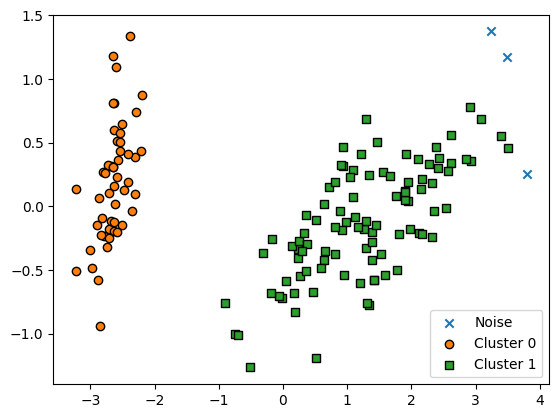

In [ ]:
## eps = 0.6 → 0.8 : Noise 개수가 줄어듦
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


<ipython-input-30-d0a336e45b28>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target], label=cluster_legend)


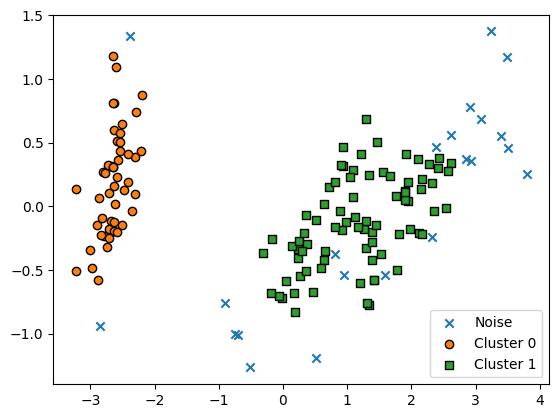

In [ ]:
## min_samples = 8 → 16 : Noise 개수 늘어남
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### **복잡한 기하학적 분포를 가지는 데이터 세트에서의 DBSCAN**
- make_circles()
        sklearn.datasets.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)

        - noise: 노이즈 데이터 세트의 비율
        - factor: 외부 원과 내부 원의 scale 비율

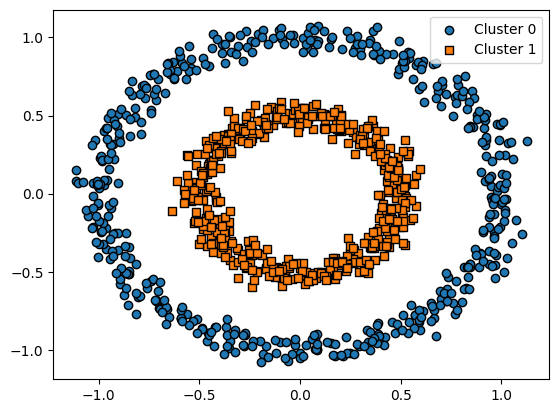

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


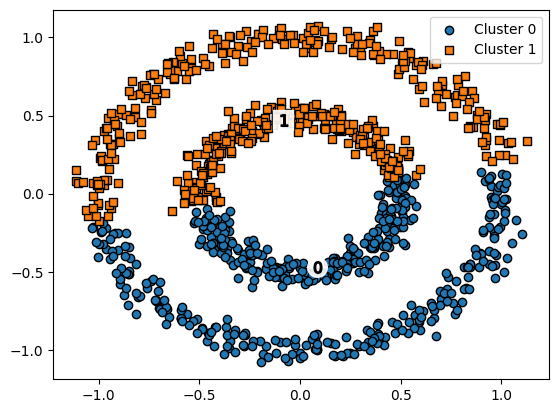

In [ ]:
# KMeans로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

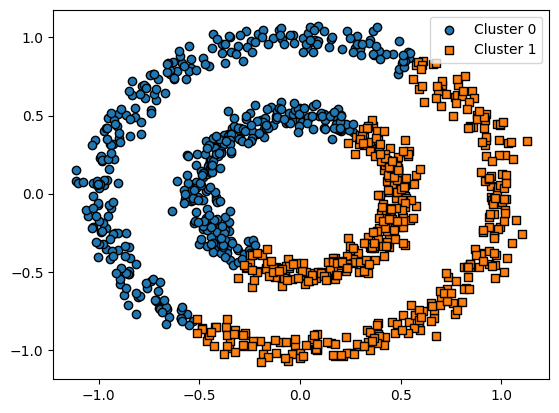

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

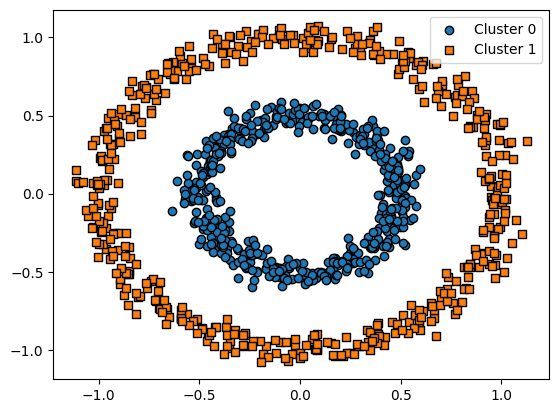

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## **7.6 실습 - 고객 세그먼테이션**
### **고객 세그먼테이션**
- 다양한 기준으로 고객을 분류하는 기법으로 CRM이나 마케팅의 중요 기반 요소
- 타깃 마케팅: 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤명 마케팅이나 서비스를 제공하는 것

### **RFM 기법**
- 고객 세그먼테이션에서 고객의 어떤 요소를 기반으로 군집화할 것인지 결정하는 기법 중 하나
        - RECENCY (R): 가장 최근 상품 구입 일에서 오늘까지의 기간
        - FREQUENCY (F): 상품 구매 횟수
        - MONETARY VALUE (M): 총 구매 금액


### **데이터 세트 로딩**

    - InvoiceNo: 주문번호, 'C'로 시작하는 것은 취소 주문
    - StockCode: 제품 코드
    - Description: 제품 설명
    - Quantity: 주문 제품 건수
    - InvoiceDate: 주문 일자
    - UnitPrice: 제품 단가
    - CustomerID: 고객 번호
    - Country: 국가명 (주문 고객의 국적)

In [50]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='/content/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [51]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- 전체 데이터는 541,909개
- CustomerID의 Null값이 13만 5천 건으로 매우 많다
- 그 외 다른 컬럼의 경우도 오류 데이터가 존재

### **데이터 클렌징**
1.  Null 데이터 제거
        - 특히 CustomerID의 경우, 고객 세그먼테이션을 수행하므로 고객 식별 번호가 없는 데이터는 필요 없음 (drop)
2.  오류 데이터 삭제
        - Quntity 또는 UnitPrice가 0보다 작은 경우
        - Quntity가 0보다 작은 경우는 오류 데이터라기보다는 주문취소를 뜻하는 값이기는 함. 이 경우 invoiceNo의 앞자리는 'C'
        → 분석의 효율성을 위해 모두 삭제
3.  Country (주문 고객 국가)
        - 주요 주문 고객인 영국 이외 국가의 데이터는 모두 제외

In [52]:
# 불린 인덱싱을 통해 필터링
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [53]:
retail_df['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [54]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape)

(354321, 8)


### **RFM 기반 데이터 가공**

In [55]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice'] # 주문 금액 컬럼 생성
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [57]:
print(retail_df['CustomerID'].value_counts().head(5))
print('\n')
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64


CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


- 개인 고객의 주문과 소매점의 주문이 함께 포함되어 있어 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있음

---

- 식별자: `주문번호(InvoiceNo) + 상품코드(StockCode)`
- InvoiceNo + StockCode로 Group by를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 됨

In [58]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [60]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency: InvoiceDate 컬럼의 max()
# Frequency: InvoiceDate 컬럼의 count()
# Monetary value: sale_amount 컬럼의 sum()

aggregations = {
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate' : 'Recency',
                                    'InvoiceNo' : 'Frequency',
                                    'sale_amount' : 'Monetary'})
cust_df = cust_df.reset_index() # index였던 CustomerID
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [61]:
# Recency: 오늘 날짜(2011/12/10) 기준 가장 최근 주문 일자를 뺀 날짜
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days + 1)
print('cust_df 로우와 컬럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### **RFM 기반 고객 세그먼테이션**
- 개인 고객의 주문과 소매업체의 대규모 주문을 포함하고 있으므로 데이터가 매우 왜곡된 분포를 가짐
- 따라서 군집화가 한쪽 군집에만 집중되는 현상이 발생 !

---

#### **왜곡된 데이터 분포도에서 군집화를 수행하면?**

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

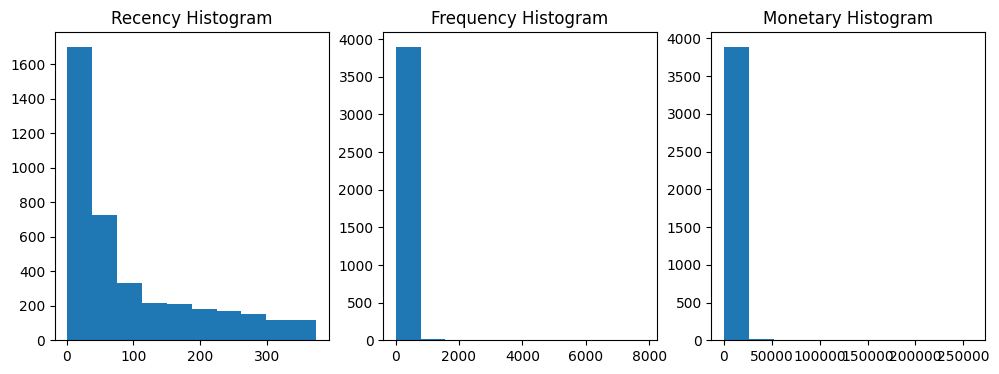

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])
ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])
ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [63]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


왜곡 정도가 매우 높은 데이터 세트에 K-means 알고리즘을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨

→ **StandardScaler 표준화 후 K-means 수행**

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는: 0.592


군집이 3개일 때, 실루엣 스코어는 0.592로 높은 편이지만,

---

**군집 2개** | 0번 군집과 1번 군집이 너무 개괄적으로 군집화

**군집 3개 이상** | 데이터 세트의 개수가 너무 작은 군집이 만들어짐 → 실루엣 계수 상대적으로 ↓, 군집 내부에 데이터가 광범위하게 퍼져 있음

---

- 군집 수를 늘려봐야 소수의 데이터 세트 군집만을 지속적으로 분리하게 되므로 의미 없음

- 지나치게 왜곡된 데이터 세트는 K-means와 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 됨

**데이터 세트의 왜곡 정도를 낮추기 위한 로그 변환**

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 컬럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는: 0.303


- 로그 변환 후의 실루엣 스코어는 0.303으로 이전보다 떨어졌지만,

---

- 이전보다 더 균일하게 군집화가 구성되었음
- 즉, 개별 군집이 더 균일하게 나뉘었음

---

**왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후 군집화를 수행하면 더 나은 결과를 도출할 수 있음 !**